# SMS Spam Classifier: Multinomial Naive Bayes

## 1. Importing and Preprocessing Data
### Import libraries

In [59]:
import pandas as pd
import numpy as np

# splitting into test and train
from sklearn.model_selection  import train_test_split

# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer

# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# printing the overall accuracy
from sklearn import metrics

# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [5]:
sms_dataframe = pd.read_csv("smsspamcollection.csv", names=["Class", "sms"])
print(sms_dataframe.shape)
sms_dataframe.head()

(5572, 2)


,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Classifying the spam and ham

In [6]:
ham_spam = sms_dataframe.Class.value_counts()
ham_spam

ham     4825
spam     747
Name: Class, dtype: int64

#### Percentage of Spam and Ham

In [14]:
total_spam_ham = ham_spam[0] + ham_spam[1]
print("Percentage of Spam is: \t{:0.2f}%".format((ham_spam[1]/total_spam_ham) * 100))
print("Percentage of Ham is: \t{:0.2f}%".format((ham_spam[0]/total_spam_ham) * 100))

Percentage of Spam is: 	13.41%
Percentage of Ham is: 	86.59%


### Map Spam and Ham to 1 and 0

In [15]:
sms_dataframe["Class"] = sms_dataframe.Class.map({ "ham": 0, "spam": 1})

In [16]:
sms_dataframe.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Convert to X and y

In [18]:
X_axis = sms_dataframe.sms
y_axis = sms_dataframe.Class

### Train Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_axis, y_axis, random_state=100)

In [20]:
X_train.head()

108     How would my ip address test that considering ...
3306    Ee msg na poortiyagi odalebeku: Hanumanji 7 na...
2022    I don't have anybody's number, I still haven't...
5564    Why don't you wait 'til at least wednesday to ...
5178    SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...
Name: sms, dtype: object

### Create the bag words without stop words

In [23]:
vect = CountVectorizer(stop_words="english")

#### Fit the X_train set

In [27]:
vect.fit(X_train)
len(vect.vocabulary_.keys())

7235

### Transforming the train and test datasets

In [32]:
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

print(X_train_transformed[0])

  (0, 793)	1
  (0, 1835)	1
  (0, 1868)	1
  (0, 3492)	1
  (0, 3511)	1
  (0, 4220)	1
  (0, 5652)	1
  (0, 6351)	1


## 2 a. Building and Evaluating the Model (MultinomialNB)

In [34]:
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train_transformed.toarray(), y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed.toarray())


# Predict the probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed.toarray())

### Model Evaluation

In [37]:
metrics.accuracy_score(y_test, y_pred_class)

0.9849246231155779

In [41]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[1197    9]
 [  12  175]]


### Accuracy, Sensitivity, Specificity, Precision

In [47]:
accuracy = float(TP + TN) / (TP + TN + FP + FN)
print("Accuracy\t{:0.2f}%".format(accuracy * 100))

sensitivity = TP / float(FN + TP)
print("Sensitivity\t{:0.2f}%".format(sensitivity * 100))

specificity = TN / float(TN + FP)
print("Specificity\t{:0.2f}%".format(specificity * 100))

precision = TP / float(TP + FP)
print("Precision\t{:0.2f}%".format(precision * 100))

Accuracy	98.49%
Sensitivity	93.58%
Specificity	99.25%
Precision	95.11%


### Precision Score, Recall Score, F1 Score

In [67]:
print("PRECISION SCORE :\t{:0.2f}%".format(metrics.precision_score(y_test, y_pred_class) * 100))
print("RECALL SCORE :\t\t{:0.2f}%".format(metrics.recall_score(y_test, y_pred_class) * 100))
print("F1 SCORE :\t\t{:0.2f}%".format(metrics.f1_score(y_test, y_pred_class) * 100))

PRECISION SCORE :	95.11%
RECALL SCORE :		93.58%
F1 SCORE :		94.34%


## ROC Curve

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
"ROC area under the curve: {:0.2f}%".format(roc_auc * 100)

'ROC area under the curve: 98.72%'

### Plot the ROC curve

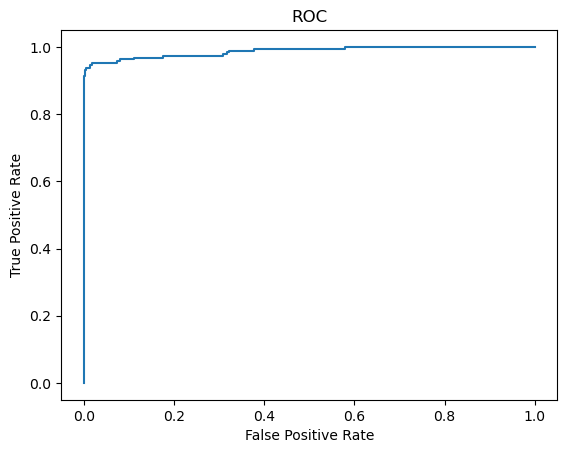

In [57]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

## 2 b: Building and Evaluating the Model (BernoulliNB)

In [61]:
bnb = BernoulliNB()

bnb.fit(X_train_transformed.toarray(), y_train)

y_pred_class_bnb = bnb.predict(X_test_transformed.toarray())

y_pred_proba_bnb = bnb.predict_proba(X_test_transformed.toarray())

In [62]:
confusion_bnb = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_class_bnb)
confusion_bnb

array([[1205,    1],
       [  35,  152]])

In [65]:
TN_bnb = confusion_bnb[0,0]
FP_bnb = confusion_bnb[0,1]
FN_bnb = confusion_bnb[1,0]
TP_bnb = confusion_bnb[1,1]

### Accuracy, Sensitivity, Specificity, Precision

In [66]:
accuracy_bnb = float(TP_bnb + TN_bnb) / (TP_bnb + TN_bnb + FP_bnb + FN_bnb)
print("Accuracy\t{:0.2f}%".format(accuracy_bnb * 100))

sensitivity_bnb = TP_bnb / float(FN_bnb + TP_bnb)
print("Sensitivity\t{:0.2f}%".format(sensitivity_bnb * 100))

specificity_bnb = TN_bnb / float(TN_bnb + FP_bnb)
print("Specificity\t{:0.2f}%".format(specificity_bnb * 100))

precision_bnb = TP_bnb / float(TP_bnb + FP_bnb)
print("Precision\t{:0.2f}%".format(precision_bnb * 100))

Accuracy	97.42%
Sensitivity	81.28%
Specificity	99.92%
Precision	99.35%


### Precision Score, Recall Score, F1 Score

In [68]:
print("PRECISION SCORE :\t{:0.2f}%".format(metrics.precision_score(y_test, y_pred_class_bnb) * 100))
print("RECALL SCORE :\t\t{:0.2f}%".format(metrics.recall_score(y_test, y_pred_class_bnb) * 100))
print("F1 SCORE :\t\t{:0.2f}%".format(metrics.f1_score(y_test, y_pred_class_bnb) * 100))

PRECISION SCORE :	99.35%
RECALL SCORE :		81.28%
F1 SCORE :		89.41%


## ROC Curve

In [69]:
false_positive_rate_bnb, true_positive_rate_bnb, thresholds_bnb = roc_curve(y_test, y_pred_proba_bnb[:,1])
roc_auc_bnb = auc(false_positive_rate_bnb, true_positive_rate_bnb)
"ROC area under the curve: {:0.2f}%".format(roc_auc_bnb * 100)

'ROC area under the curve: 99.56%'

### Plot the ROC curve

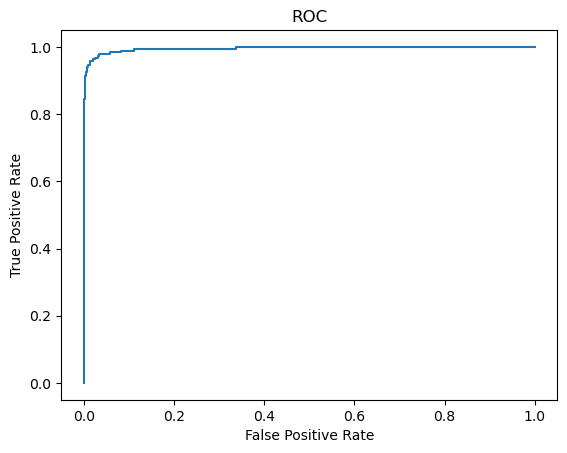

In [70]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_bnb, true_positive_rate_bnb)